In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
columns = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
# load dataset
uri = Path("../../res/iris.csv")
df = pd.read_csv(uri, names=columns)
# split dataset into features and class:
# features
X = df.iloc[:, :-1].copy()
# class
y = df.iloc[:, -1].copy()

In [ ]:
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

print("PCA Feature Selection\n")

print("\nThe eigenvalues are {}\n".format(eigenvalues))
print("The eigenvectors are:")
print(eigenvectors)
pca_range = np.arange(1, len(eigenvalues) + 1)
print('\nPCA range: {}'.format(pca_range))

PCA Feature Selection


The eigenvalues are [2.93035378 0.92740362 0.14834223 0.02074601]

The eigenvectors are:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]

PCA range: [1 2 3 4]


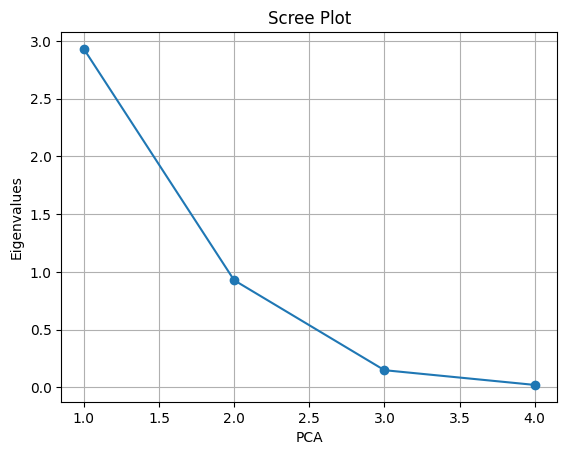

In [11]:
plt.plot(pca_range, eigenvalues, marker="o", linestyle="-")
plt.title("Scree Plot")
plt.xlabel("PCA")
plt.ylabel("Eigenvalues")
plt.grid(True)
plt.show()

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


y_pred = cross_val_predict(
    estimator=DecisionTreeClassifier(),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    X=X_pca,
    y=y,
)

cm = confusion_matrix(y, y_pred=y_pred)
acc = accuracy_score(y, y_pred=y_pred)

In [13]:
print("\nThe confusion matrix is:")
print("{}\n".format(cm))
print("The accuracy score is: {}\n".format(acc))


The confusion matrix is:
[[50  0  0]
 [ 0 46  4]
 [ 0  6 44]]

The accuracy score is: 0.9333333333333333



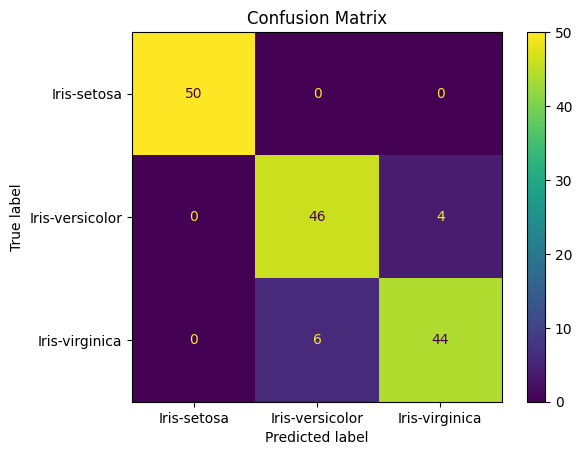

In [21]:
class_names = df['class'].unique()
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
display.plot()
plt.title('Confusion Matrix')
plt.show()